# Part 1 Data Preprocessing

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
dataset = pd.read_csv('/content/insurance.csv')

In [76]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [78]:
dataset.shape

(1338, 7)

In [79]:
dataset.dtypes
#so we are gonna predict the insurance of a person lol

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [80]:
dataset.select_dtypes(include='object').columns
#ahhhh ung categorical values ung may letters lol

Index(['sex', 'smoker', 'region'], dtype='object')

In [81]:
 dataset.select_dtypes(include=['int64','float64']).columns
 #eto ung may number lang lol hahaha bobo ko pota xD

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [82]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [83]:
#tignan natin kung may nawawala sa csv file ung may null
dataset.isnull().values.sum()
#dataset.isnull().values.any()

0

##Categorical Data 

our target is the charges


In [84]:
#so our categorical values are objects
dataset.select_dtypes(include='object').columns
#but our target variable is the charges

Index(['sex', 'smoker', 'region'], dtype='object')

##group the dataset by categorical columns sex, gender, region

In [85]:
dataset.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [86]:
dataset.groupby('smoker').mean()
#big diff ung smoker tsaka sa nde

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [87]:
dataset.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [88]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
#onehot encoding

In [90]:
dataset = pd.get_dummies(data=dataset, drop_first=True)
#lahat ng object magiging number tas drop natin ung age

In [91]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


##Correlation matrix

In [92]:
#eto na kelangan natin ng isa pang dataset pra ihiwalay ung charges
dataset_2 = dataset.drop(columns='charges')

<Axes: title={'center': 'Correlation with charges'}>

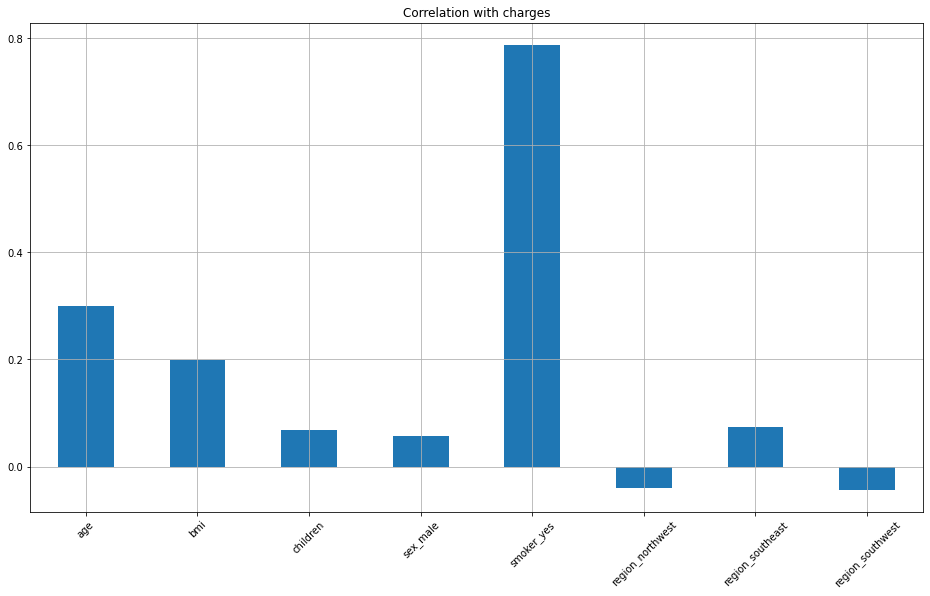

In [93]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='Correlation with charges' , rot=45, grid=True
)

In [94]:
corr = dataset.corr()

<Axes: >

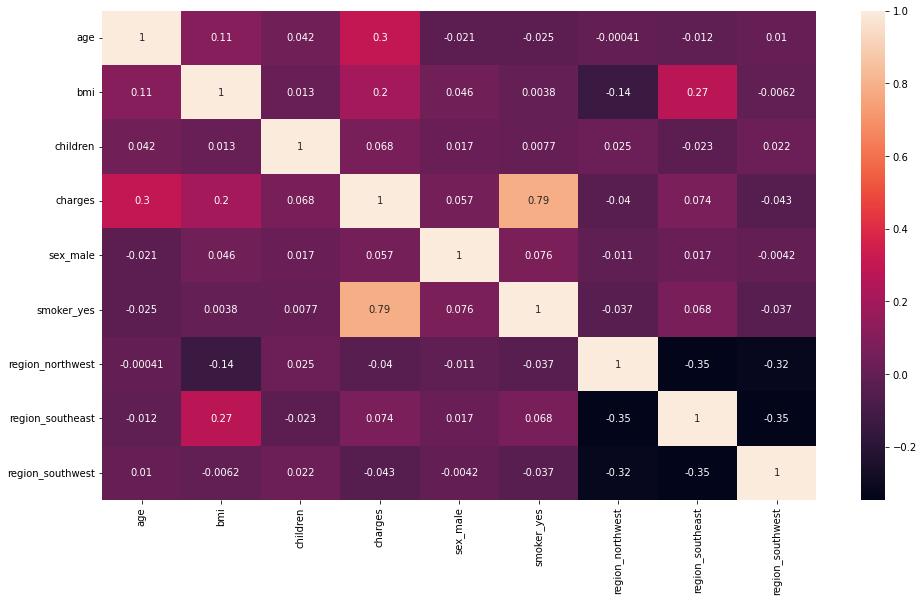

In [95]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

##splitting the dataset

In [96]:
#now we are putting the test and the train shit
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [97]:
x = dataset.drop(columns='charges')
#selecting all columns but charges so ung x axis ntin walang charges lol

In [98]:
y = dataset['charges']
#tas sa y-axis natin lalagay ung charges

In [99]:
#splitting dataset
from sklearn.model_selection import train_test_split
#eto na pang split ng dataset

In [100]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

In [101]:
x_train.shape

(1070, 8)

In [102]:
x_test.shape

(268, 8)

In [103]:
y_train.shape

(1070,)

In [104]:
y_test.shape

(268,)

##feature scaling


In [105]:
#parang is sscale lang ng 0. something ung mga number pra nde ganun kalaki ung agwat sa isat isa
#magiging decimal ung scaling ng pag train pra nde malaki agwat

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#syempre pra sa x lang yan tas transfor lang sa test may fit sa train pra may train din sya

In [107]:
x_train


array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [108]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

In [109]:
y_train


621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

#Part 2 Building the Model

##multiple linear regression

In [114]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
#in linear regression we dont have to do random state

In [115]:
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [117]:
y_pred = regressor_lr.predict(x_test)
#gagamitin ntin ung x test pra sa prediction

In [118]:
#so pag linear regression malalaking number so we use r2_score
from sklearn.metrics import r2_score

In [121]:
r2_score(y_test, y_pred)
#best score mo 1 pwede maging negative so prang ccheck natin anu ung score ng accuracy ng test
#una ung test bago ung pred lagi 
#so around 80 percent

0.7999876970680433

##random forest regression

In [123]:
#pag regressor un ung malakihang number pag classifier binary outcome


In [124]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(random_state=0)
regressor_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

check natin ung accuracy ulit


In [125]:
y_pred = regressor_rf.predict(x_test)
r2_score(y_test, y_pred)

0.876334785800141

## 3 EXGboost regression

In [126]:
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [128]:
#tas predict ulit
y_pred = regressor_xgb.predict(x_test)
r2_score(y_test, y_pred)

0.8522198224702313

#finalizing model sya kunuha nya xgb ako random forest

In [130]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(random_state=0)
regressor_rf.fit(x_train, y_train)

y_pred = regressor_rf.predict(x_test)
r2_score(y_test, y_pred)

0.876334785800141

predict for
frank age:40 sex: 1 bmi: 45.50 child: 4 smoker: 1 region:north east

In [131]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [132]:
frank_obs = [[40,45.5,4,1,1,0,0,0]]

In [134]:
regressor_rf.predict(sc.transform(frank_obs))
#ung sc standard scalar yan

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([45224.4117263])

In [140]:
regressor_xgb.predict(sc.transform(frank_obs))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([47343.31], dtype=float32)

In [135]:
sara_obs = [[19,27.9,0,0,0,1,0,0]]

In [136]:
sara_obs

[[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [138]:
regressor_xgb.predict(sc.transform(sara_obs))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1054.8451], dtype=float32)

In [139]:
regressor_rf.predict(sc.transform(sara_obs))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2214.599147])